In [5]:
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean

%matplotlib inline

In [6]:
dir='/work/teletravaille/truth_state/'
file_1='truth.cdf'

In [7]:
truth=xr.open_dataset(dir+file_1)

In [8]:
lat=truth.latxy
lon=truth.lonxy

In [9]:
SSH_true=truth.SSH
SST_true=truth.SST
SSS_true=truth.SSS
U_true=truth.U
V_true=truth.V

In [10]:
SSH_true=SSH_true.squeeze()
SST_true=SST_true.squeeze()
SSS_true=SSS_true.squeeze()
U_true=U_true.squeeze()
V_true=V_true.squeeze()

In [11]:

SSH_true.shape


(54, 61)

In [12]:

SST_true.shape


(54, 61)

## Plot the true state 5 variables

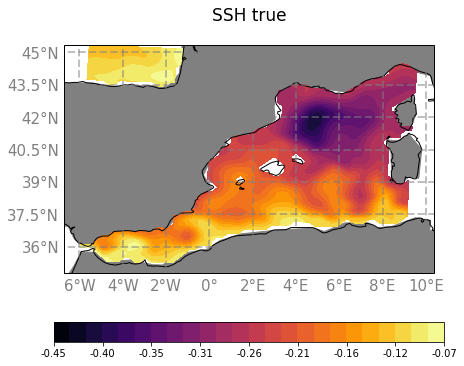

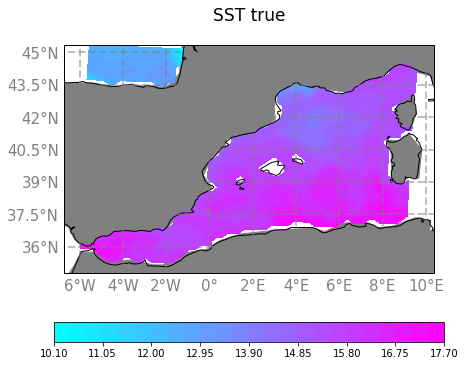

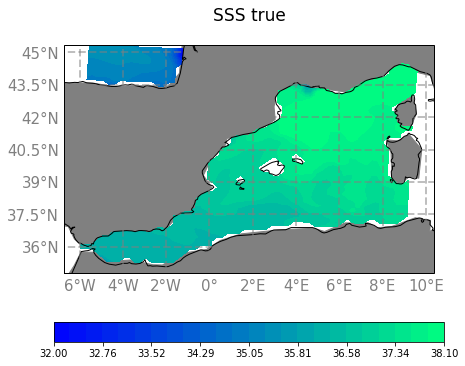

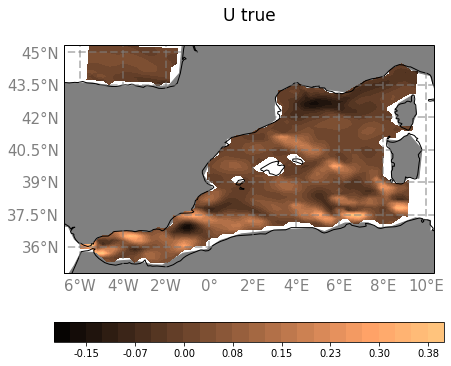

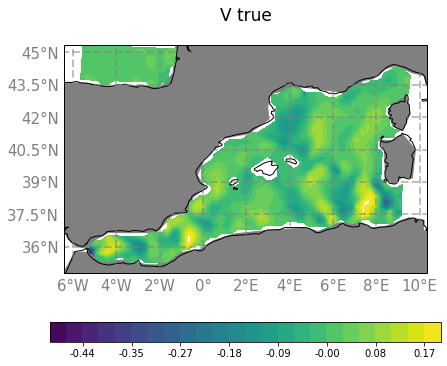

In [9]:


levels_SSH = np.linspace(-0.45, -0.07, 25)
levels_SST = np.linspace(10.1, 17.7, 25)
levels_SSS = np.linspace(32, 38.1, 25)
levels_U = np.linspace(-0.2, 0.4, 25)
levels_V = np.linspace(-0.5, 0.2, 25)


cmap = [plt.get_cmap('inferno'),plt.get_cmap('cool'), plt.get_cmap('winter'), plt.get_cmap('copper'), plt.get_cmap('viridis')]
var = [SSH_true, SST_true, SSS_true, U_true, V_true]
levels = [levels_SSH, levels_SST, levels_SSS, levels_U, levels_V]
title = ['SSH true', 'SST true', 'SSS true', 'U true', 'V true']

for ii in [0,1,2,3,4]:
    fig = plt.figure(figsize=(7,6))
    ax1 = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
    pcolor = ax1.contourf(lon,lat,var[ii], levels=levels[ii], transform=ccrs.PlateCarree(),cmap=cmap[ii])
    cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=1, format='%0.02f') 
    ax1.set_title(title[ii] ,size=17,y=1.08)

    ax1.add_feature(cfeature.LAND,facecolor='grey')
    ax1.coastlines(resolution='50m')
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.ylabel_style = {'size': 15, 'color': 'gray'}
#    plt.savefig('/C/work/teletravaille/UV_0.01/'+title[ii])
    plt.savefig(title[ii])


#plt.suptitle('Local Mean' ,size=19)
#plt.show(SSH_global_mean)

## U,V vector

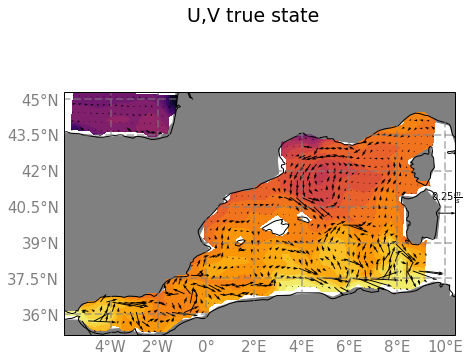

In [16]:
levels_U = np.linspace(-0.2, 0.4, 25)
levels_V = np.linspace(-0.5, 0.2, 25)
levels_SST = np.linspace(10.1, 17.7, 25)


fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
cmap = plt.get_cmap('inferno')
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines(resolution='50m')
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
pcolor = ax.contourf(lon,lat, SST_true, levels=levels_SST, transform=ccrs.PlateCarree(),cmap=cmap)

#mm = ax.pcolormesh(lon, lat, U_global_mean, transform = ccrs.PlateCarree(), cmap=cmap)

#df_ta = pandas.DataFrame(data = U_global_mean, dtype=numpy.float64)
#df_ta.apply(lambda c: talib.RSI(c, timeperiod = 14)

Q =ax.quiver( lon[::2].values, lat[::2].values, U_true[::2].values,V_true[::2].values,transform=ccrs.PlateCarree(), scale=None,scale_units='inches')
Q._init()
assert isinstance(Q.scale, float)
#ax.quiverkey(Q,x=0.3,y=1.1, u=1, label='m/s')
ax.quiverkey(Q, 0.98, 0.5, 0.25, r'$0.25 \frac{m}{s}$')
plt.suptitle('U,V true state' ,size=19)
plt.savefig('U,V true state')

plt.show()